In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px
from scipy import stats

###Read in the gapminder_clean.csv data as a pandas DataFrame.




In [2]:
#read dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Practice/gapminder_clean.csv")

In [3]:
df.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


###Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.

In [4]:
#filter data
df_filtered = df[df["Year"] == 1962]
df_1962 = df_filtered[['gdpPercap', 'CO2 emissions (metric tons per capita)']].dropna()

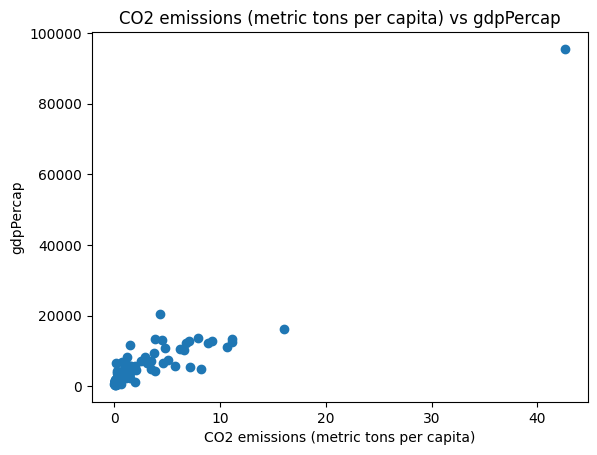

In [5]:
#plot CO2 vs gdpPercap
plt.scatter(df_1962['CO2 emissions (metric tons per capita)'], df_1962['gdpPercap'])
plt.xlabel("CO2 emissions (metric tons per capita)")
plt.ylabel("gdpPercap")
plt.title("CO2 emissions (metric tons per capita) vs gdpPercap")
plt.show()

###On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value?

In [6]:
x = df_1962['CO2 emissions (metric tons per capita)']
y = df_1962['gdpPercap']

#correlation and associated p value
corr, p = pearsonr(x, y)
print(f'Correlation = {corr}')
print(f'p value = {p}')


Correlation = 0.9260816725019472
p value = 1.1286792210038658e-46


Text(0.5, 1.0, 'CO2 Emissions vs GDP per Capita (1962)')

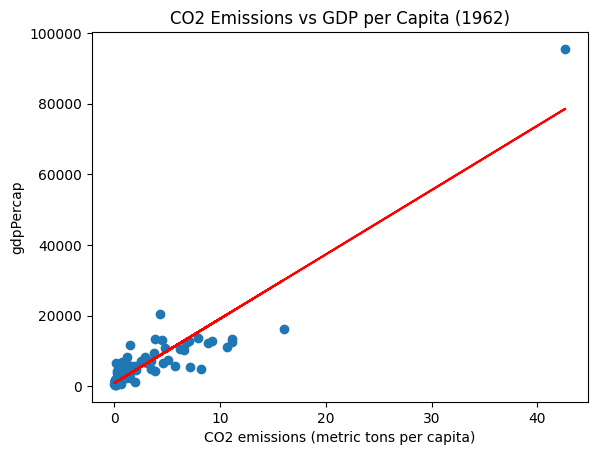

In [7]:
#fit linear regression line
slope, intercept = np.polyfit(x, y, 1)

#plot
plt.scatter(x, y)

#plot regression line
plt.plot(x, slope*x + intercept, color='red')
plt.xlabel("CO2 emissions (metric tons per capita)")
plt.ylabel("gdpPercap")
plt.title('CO2 Emissions vs GDP per Capita (1962)')

###On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...

In [8]:
df_cleaned = df.dropna(subset=["CO2 emissions (metric tons per capita)", "gdpPercap"]).reset_index(drop=True)

#calculate correlation for each year
correlation = []
for year in df_cleaned['Year'].unique():
  df_year = df_cleaned[df_cleaned['Year'] == year]
  x = df_year['CO2 emissions (metric tons per capita)']
  y = df_year['gdpPercap']
  if len(x) >= 2: #need to have at least 2 data points to calculate corr
    corr, p = pearsonr(x, y)
    correlation.append((year, corr))

#create dataframe
corr_df = pd.DataFrame(correlation, columns=['Year', 'Correlation'])

#find year with strongest correlation
corr_df['abs_corr'] = corr_df['Correlation'].abs()
strongest_year = corr_df.loc[corr_df['abs_corr'].idxmax(), 'Year']
print(f'Year with Strongest correlation is {strongest_year}')

Year with Strongest correlation is 1967


In [9]:
#filter the dataset to that year
df_1967 = df_cleaned[df_cleaned['Year'] == 1967]

###Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

In [10]:
fig = px.scatter(
    df_1967,
    x='gdpPercap',
    y='CO2 emissions (metric tons per capita)',
    size='pop',  #size determined by pop
    color='continent',  #color by continent
    hover_name='Country Name',  #show country name
    size_max=60,  #max size of the bubbles
    title='CO2 Emissions vs GDP per Capita',
)

fig.update_layout(
    xaxis_title='GDP per Capita',
    yaxis_title='CO2 Emissions (metric tons per capita)'
)

fig.show()

###What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Practice/gapminder_clean.csv")
df_cleaned = df[['continent', 'Energy use (kg of oil equivalent per capita)']].dropna()

In [16]:
#create dictionary to store values for each continent
grouped_data = {}
for continent in df_cleaned['continent'].unique():
    grouped_data[continent] = df_cleaned[df_cleaned['continent'] == continent]['Energy use (kg of oil equivalent per capita)'].values

#one way ANOVA
anova_result = stats.f_oneway(*grouped_data.values())
print(anova_result.statistic)
print(anova_result.pvalue)

51.459157590426344
8.527003487154367e-39


Results showed a p-value smaller than 0.05. Therefore, we conclude that there is a significant different in energy use between continents.

###Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)


In [18]:
#filter data (after 1990, Europe and Asia)
df_after_1990 = df[df['Year'] > 1990]
df_filtered = df_after_1990[df_after_1990['continent'].isin(['Europe', 'Asia'])]
df_cleaned = df_filtered[['continent', 'Imports of goods and services (% of GDP)']].dropna()

#split into two dataset
df_europe = df_cleaned[df_cleaned['continent'] == 'Europe']['Imports of goods and services (% of GDP)']
df_asia = df_cleaned[df_cleaned['continent'] == 'Asia']['Imports of goods and services (% of GDP)']

In [19]:
#perform  two sample independent t-test
t_test_result = stats.ttest_ind(df_europe, df_asia)
print(t_test_result.statistic)
print(t_test_result.pvalue)

-1.4185256887958868
0.15751969325554196


Results showed a p-value bigger than 0.05, therefore, we conclude that there is no significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990.

###What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

In [20]:
#filter data
df_density = df[['Country Name', 'Year', 'Population density (people per sq. km of land area)']].dropna()

df_density['rank'] = df_density.groupby('Year')['Population density (people per sq. km of land area)'].rank(ascending=False, method='average') #higher density better rank

avg_ranks = df_density.groupby('Country Name')['rank'].mean()

best_countries = avg_ranks[avg_ranks == avg_ranks.min()]

print("Country/Countries with the highest average population density rank:")
print(best_countries)

Country/Countries with the highest average population density rank:
Country Name
Macao SAR, China    1.5
Monaco              1.5
Name: rank, dtype: float64


In [32]:
top_10_dense = avg_ranks.sort_values().head(10)
print(top_10_dense)

Country Name
Macao SAR, China              1.5
Monaco                        1.5
Hong Kong SAR, China          3.1
Singapore                     3.9
Gibraltar                     5.0
Bermuda                       6.2
Malta                         7.0
Bangladesh                    9.2
Channel Islands               9.4
Sint Maarten (Dutch part)    10.5
Name: rank, dtype: float64


###What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?

In [38]:
#filter data (1962/2007)
df_life_expectancy = df[df['Year'].isin([1962, 2007])][['Country Name', 'Year', 'Life expectancy at birth, total (years)']].dropna()

#create data table
df_life_table = df_life_expectancy.pivot(index='Country Name', columns='Year', values='Life expectancy at birth, total (years)')

#calculate the amount of increase
df_life_table['increase'] = df_life_table[2007] - df_life_table[1962]

#find the country with the greatest increase
greatest_increase = df_life_table['increase'].idxmax()
print(f'Country with the greatest increase in life expectancy is {greatest_increase}')

Country with the greatest increase in life expectancy is Maldives
